# Introduction

1. You will find nearly everything on Google  
2. A programmer is someone who can turn Stack Overflow answers into running code  
3. The most important part is when you try it yourself
3. If your code is too complicated, there must be another solution

#  Data collection
The goal of this step is to obtain a **Dataframe** which is a Python equivalent of a spreadsheet.  
Data can be found in various forms but the most commons are **CSV** (for downloadable resources), **JSON** (mostly in APIs), **HTML/XML** (when you scrap) and **Databases** (for example SQL). 


### Scraping data
Scraping data consists in extracting it from the web.  
There are many different libraries to do so such as **beautifulsoup** or **lxml** as we saw in **beyond excel**.   
Scraping data requires some knowledge in HTML and CSS.  
Also there are a few rules to follow :  
- be careful and polite
- give credit
- care about media law
- don't be evil (no spam, overloading sites, etc.)
- respect robots.txt




### Getting data from an API
Some fun and useful API : 
- [IFTTT](https://ifttt.com/)
- [Open weather map](http://openweathermap.org/)
- [SNCF](https://data.sncf.com/api)
- [Google](https://console.developers.google.com/apis/library?pli=1)
- [Enedis](https://data.enedis.fr/page/accueil/)

In [33]:
#Import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading open data
Some websites have downloadable open data.   
For this live demo we are interested in data on deputes.  
After some search on google we found this page : [https://www.nosdeputes.fr/synthese](https://www.nosdeputes.fr/synthese)   
We could have scrap it but luckily they have a downloadable csv file !

In [46]:
deputes = pd.read_csv('./nosdeputes.fr_synthese_2017-05-17.csv', delimiter=";",index_col=0)

# Data cleaning

- Filter out unrelated data. 
- Replace missing values.  
- Fix mispelling errors. 
- Remove outliers. 

In [47]:
# show shape of data
print(deputes.shape)
# show 5 first rows 
deputes.head(5)

(631, 52)


,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,mandat_debut,...,rapports_moyenne_mensuelle,propositions_ecrites,propositions_ecrites_moyenne_mensuelle,propositions_signees,propositions_signees_moyenne_mensuelle,questions_ecrites,questions_ecrites_moyenne_mensuelle,questions_orales,questions_orales_moyenne_mensuelle,Unnamed: 52
id,,,,,,,,,,,,,,,,,,,,,
350,Damien Abad,Abad,Damien,H,1980-04-05,Nîmes (Gard),01,Ain,5,2012-06-20,...,0.13,7,0.15,488,10.38,317,6.74,23,0.49,NaN
370,Laurence Abeille,Abeille,Laurence,F,1960-06-17,Neuilly-sur-Seine (Hauts-de-Seine),94,Val-de-Marne,6,2012-06-20,...,0.06,7,0.15,58,1.23,192,4.09,20,0.43,NaN
557,Ibrahim Aboubacar,Aboubacar,Ibrahim,H,1965-02-01,Fomboni (Comores),976,Mayotte,2,2012-06-20,...,0.06,0,0.00,65,1.38,1,0.02,10,0.21,NaN
604,Élie Aboud,Aboud,Élie,H,1959-10-12,Beyrouth (Liban),34,Hérault,6,2012-12-17,...,0.00,10,0.24,261,6.21,415,9.88,14,0.33,NaN
173,Bernard Accoyer,Accoyer,Bernard,H,1945-08-12,Lyon (Rhône),74,Haute-Savoie,1,2012-06-20,...,0.00,22,0.47,237,5.04,74,1.57,13,0.28,NaN


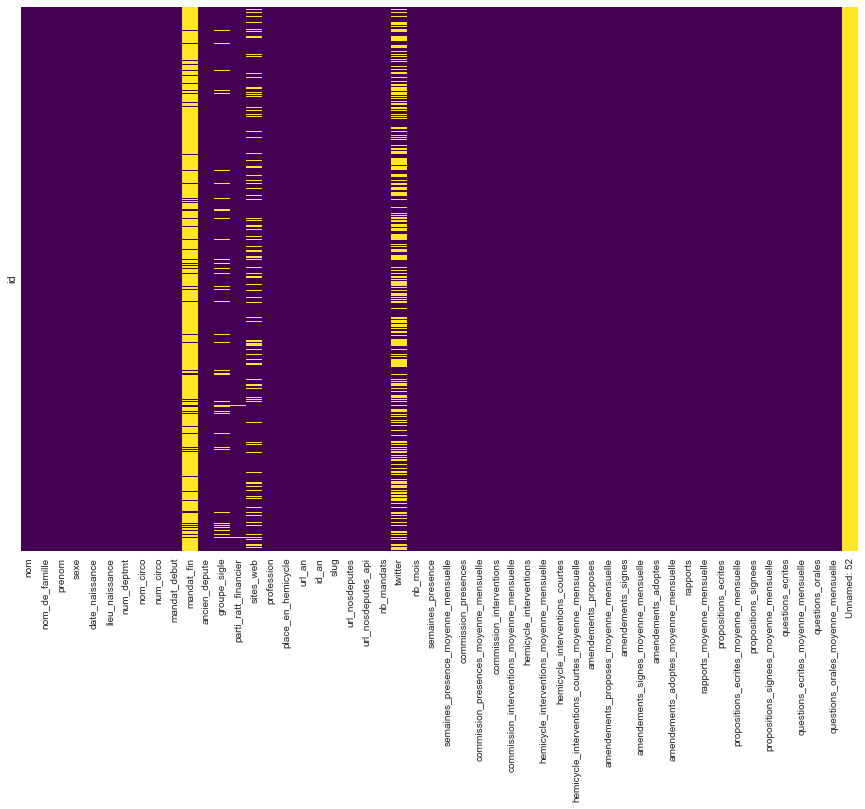

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(deputes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
# drop incomplete columns
deputes.drop(['twitter', 'sites_web','mandat_fin'],axis=1,inplace=True)

In [50]:
# drop strange last column
deputes.drop(deputes.columns[-1], axis=1,inplace=True)

In [51]:
# drop remaining incomplete rows 
deputes.dropna(inplace=True, axis=0)

In [52]:
# show new shape
deputes.shape

(586, 48)

In [53]:
deputes.dtypes

nom                                                   object
nom_de_famille                                        object
prenom                                                object
sexe                                                  object
date_naissance                                        object
lieu_naissance                                        object
num_deptmt                                            object
nom_circo                                             object
num_circo                                              int64
mandat_debut                                          object
ancien_depute                                          int64
groupe_sigle                                          object
parti_ratt_financier                                  object
profession                                            object
place_en_hemicycle                                     int64
url_an                                                object
id_an                   

In [54]:
# Fixing data types
deputes['date_naissance'] = pd.to_datetime(deputes['date_naissance'])

In [55]:
# We want to add a new column with the age of the depute
deputes["age"] = 10
deputes.head()

,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,mandat_debut,...,rapports_moyenne_mensuelle,propositions_ecrites,propositions_ecrites_moyenne_mensuelle,propositions_signees,propositions_signees_moyenne_mensuelle,questions_ecrites,questions_ecrites_moyenne_mensuelle,questions_orales,questions_orales_moyenne_mensuelle,age
id,,,,,,,,,,,,,,,,,,,,,
350,Damien Abad,Abad,Damien,H,1980-04-05,Nîmes (Gard),01,Ain,5,2012-06-20,...,0.13,7,0.15,488,10.38,317,6.74,23,0.49,10
370,Laurence Abeille,Abeille,Laurence,F,1960-06-17,Neuilly-sur-Seine (Hauts-de-Seine),94,Val-de-Marne,6,2012-06-20,...,0.06,7,0.15,58,1.23,192,4.09,20,0.43,10
557,Ibrahim Aboubacar,Aboubacar,Ibrahim,H,1965-02-01,Fomboni (Comores),976,Mayotte,2,2012-06-20,...,0.06,0,0.00,65,1.38,1,0.02,10,0.21,10
604,Élie Aboud,Aboud,Élie,H,1959-10-12,Beyrouth (Liban),34,Hérault,6,2012-12-17,...,0.00,10,0.24,261,6.21,415,9.88,14,0.33,10
173,Bernard Accoyer,Accoyer,Bernard,H,1945-08-12,Lyon (Rhône),74,Haute-Savoie,1,2012-06-20,...,0.00,22,0.47,237,5.04,74,1.57,13,0.28,10


In [56]:
import datetime
def guess_age(birth_date):
    today = datetime.datetime.today()
    return (today-birth_date).days//365

deputes["age"] = deputes["date_naissance"].apply(guess_age)
deputes.drop(['date_naissance'],axis=1,inplace=True)
deputes.head()

,nom,nom_de_famille,prenom,sexe,lieu_naissance,num_deptmt,nom_circo,num_circo,mandat_debut,ancien_depute,...,rapports_moyenne_mensuelle,propositions_ecrites,propositions_ecrites_moyenne_mensuelle,propositions_signees,propositions_signees_moyenne_mensuelle,questions_ecrites,questions_ecrites_moyenne_mensuelle,questions_orales,questions_orales_moyenne_mensuelle,age
id,,,,,,,,,,,,,,,,,,,,,
350,Damien Abad,Abad,Damien,H,Nîmes (Gard),01,Ain,5,2012-06-20,0,...,0.13,7,0.15,488,10.38,317,6.74,23,0.49,37
370,Laurence Abeille,Abeille,Laurence,F,Neuilly-sur-Seine (Hauts-de-Seine),94,Val-de-Marne,6,2012-06-20,0,...,0.06,7,0.15,58,1.23,192,4.09,20,0.43,57
557,Ibrahim Aboubacar,Aboubacar,Ibrahim,H,Fomboni (Comores),976,Mayotte,2,2012-06-20,0,...,0.06,0,0.00,65,1.38,1,0.02,10,0.21,52
604,Élie Aboud,Aboud,Élie,H,Beyrouth (Liban),34,Hérault,6,2012-12-17,0,...,0.00,10,0.24,261,6.21,415,9.88,14,0.33,57
173,Bernard Accoyer,Accoyer,Bernard,H,Lyon (Rhône),74,Haute-Savoie,1,2012-06-20,0,...,0.00,22,0.47,237,5.04,74,1.57,13,0.28,71


# Data exploration

A [good tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html) to start learning pandas. 

## Selecting data

In [57]:
# Nom des quatres premiers députes
deputes[["nom", "age"]][0:3]

,nom,age
id,,
350,Damien Abad,37
370,Laurence Abeille,57
557,Ibrahim Aboubacar,52


## Filtering the data

In [58]:
deputes_qui_proposent = deputes[deputes.propositions_ecrites > 10]
deputes_qui_proposent[["nom","propositions_ecrites"]].head()

,nom,propositions_ecrites
id,,
173,Bernard Accoyer,22
488,Julien Aubert,17
489,Danielle Auroi,17
605,Sylvain Berrios,17
171,Véronique Besse,12


In [59]:
deputes_qui_proposent = deputes[(deputes.propositions_ecrites > 10) & (deputes.nom_circo == "Val-de-Marne")]
deputes_qui_proposent[["nom","propositions_ecrites", "nom_circo"]].head()

,nom,propositions_ecrites,nom_circo
id,,,
605,Sylvain Berrios,17,Val-de-Marne
564,Roger-Gérard Schwartzenberg,17,Val-de-Marne


## Split-apply-combine

In [60]:
deputes_partis = deputes.groupby('groupe_sigle')
average_presence = deputes_partis['semaines_presence_moyenne_mensuelle'].mean()
average_presence

groupe_sigle
GDR     2.340000
LR      2.723220
NI      2.618462
RRDP    2.586000
SER     2.841142
UDI     2.402581
Name: semaines_presence_moyenne_mensuelle, dtype: float64

In [61]:
# Parité au sein de l'assemblée  ?
deputes['sexe'].value_counts()

H    434
F    152
Name: sexe, dtype: int64

In [62]:
# Décrire rapidement l'assiduité des députes
deputes['semaines_presence_moyenne_mensuelle'].describe()

count    586.000000
mean       2.745273
std        0.705287
min        0.000000
25%        2.400000
50%        2.870000
75%        3.260000
max        3.960000
Name: semaines_presence_moyenne_mensuelle, dtype: float64

In [63]:
# Trouver le député le plus assidu 
deputes[deputes['semaines_presence_moyenne_mensuelle'] == deputes['semaines_presence_moyenne_mensuelle'].max()]

,nom,nom_de_famille,prenom,sexe,lieu_naissance,num_deptmt,nom_circo,num_circo,mandat_debut,ancien_depute,...,rapports_moyenne_mensuelle,propositions_ecrites,propositions_ecrites_moyenne_mensuelle,propositions_signees,propositions_signees_moyenne_mensuelle,questions_ecrites,questions_ecrites_moyenne_mensuelle,questions_orales,questions_orales_moyenne_mensuelle,age
id,,,,,,,,,,,,,,,,,,,,,
189,Éric Straumann,Straumann,Éric,H,Colmar (Haut-Rhin),68,Haut-Rhin,1,2012-06-20,0,...,0.11,3,0.06,357,7.6,275,5.85,16,0.34,52


In [64]:
# Nombre max de mandats
deputes['nb_mandats'].max()

4

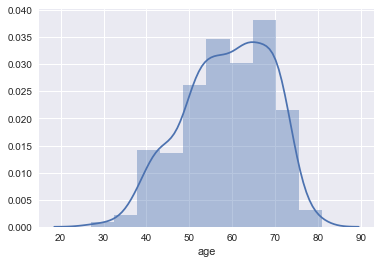

In [65]:
# Distribution des âges
sns.distplot(deputes['age'], bins=10)

In [66]:
# 10 professions les plus représentées
deputes['profession'].value_counts()[:10]

Avocat                              27
Sans profession declaree            24
Fonctionnaire de catégorie A        23
Cadre supérieur du secteur privé    21
Cadre du secteur privé              12
Chef d'entreprise                   12
Professeur du secondaire            11
Retraité de l'enseignement          11
Ingénieur                            8
Retraitée de l'enseignement          7
Name: profession, dtype: int64

In [67]:
# Taux de présence par département
deputes_deptmt = deputes.groupby('num_deptmt')['semaines_presence_moyenne_mensuelle'].mean()
deputes_deptmt.sort_values(inplace=True)
deputes_deptmt

num_deptmt
975    0.610000
986    0.630000
971    0.932500
972    1.080000
987    1.120000
988    1.180000
974    1.451429
977    1.600000
973    1.735000
32     1.805000
06     1.957000
04     2.045000
40     2.066667
2A     2.085000
83     2.142500
60     2.194286
47     2.246667
976    2.255000
84     2.258000
91     2.360000
2B     2.360000
37     2.418000
13     2.430000
57     2.476000
27     2.488000
90     2.490000
80     2.518000
25     2.534000
66     2.542500
31     2.545000
         ...   
93     3.064545
51     3.072000
10     3.076667
08     3.076667
42     3.081667
21     3.082000
55     3.095000
29     3.107500
72     3.120000
05     3.125000
71     3.140000
39     3.156667
73     3.182500
67     3.184444
17     3.204000
79     3.206667
36     3.225000
88     3.230000
44     3.257000
61     3.326667
56     3.330000
12     3.333333
22     3.336000
35     3.357500
65     3.360000
53     3.363333
48     3.380000
63     3.382000
89     3.486667
09     3.625000
Name: semaine

# Data visualisation
An [awesome catalogue](http://www.datavizcatalogue.com/) of different kind of dataviz.

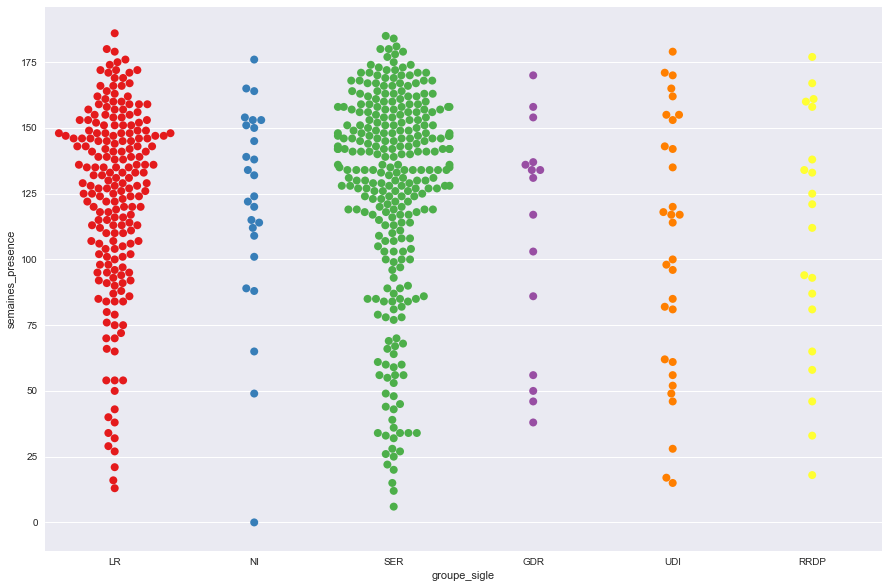

In [68]:
# Taux de présence par Parti
# https://fr.wikipedia.org/wiki/Liste_des_partis_et_mouvements_politiques_fran%C3%A7ais
plt.figure(figsize=(15,10))
deputes_parti = deputes.groupby('groupe_sigle')['semaines_presence_moyenne_mensuelle'].mean()
deputes_parti.sort_values(inplace=True, ascending=0)
deputes_parti
sns.swarmplot(x="groupe_sigle", y="semaines_presence", data=deputes,palette='Set1',size=8)


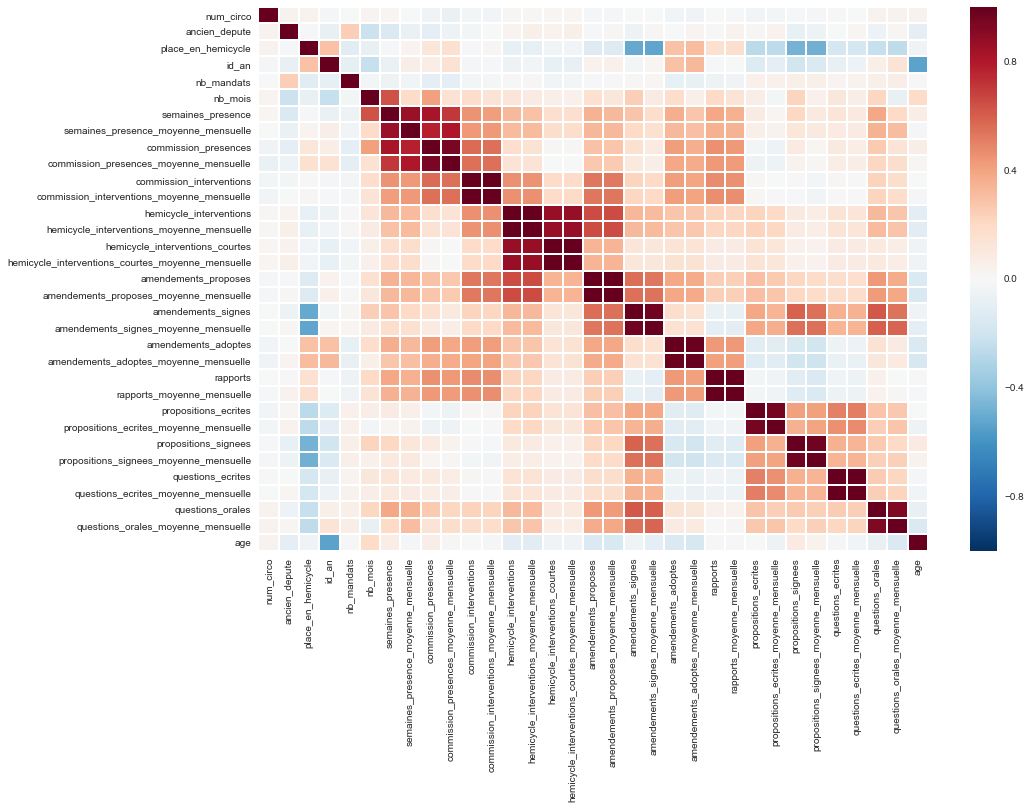

In [69]:
# Découvrir des corrélations
tc = deputes.corr()
plt.figure(figsize=(15,10))
sns.heatmap(tc, linecolor='white', linewidths=1)

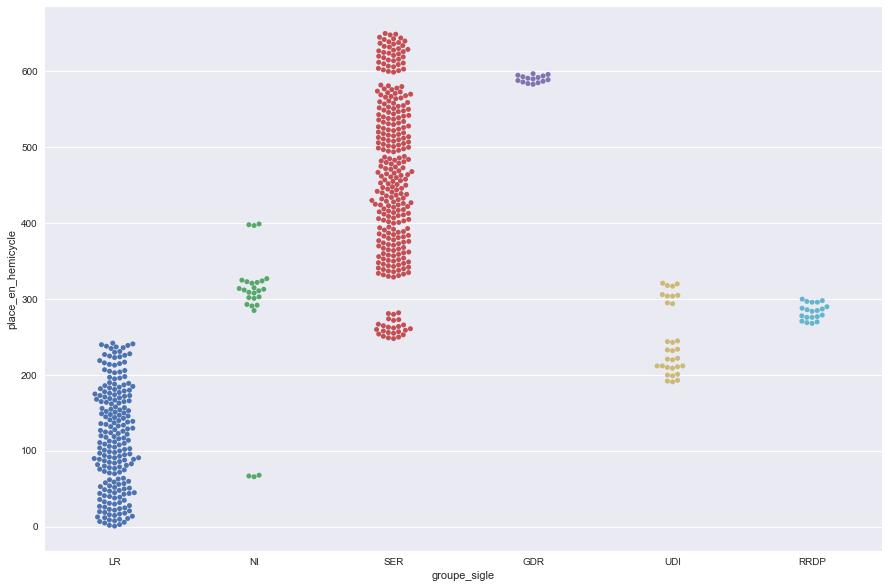

In [26]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="groupe_sigle", y="place_en_hemicycle", data=deputes)

# Can we guess someone's party from his hemicycle position ?
Which [algorithm](http://scikit-learn.org/stable/tutorial/machine_learning_map/) should I use ? 

In [71]:
# split the dataset for training and testing
from sklearn.model_selection import train_test_split
X = deputes[['place_en_hemicycle']]
y = deputes['groupe_sigle']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [72]:
# Train
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
# predict
predictions = svc_model.predict(X_test)

In [74]:
# Compare
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 0  0  0  0  6  0]
 [ 0 52  0  0 12  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0 63  0]
 [ 0  1  0  0  6  0]]


In [31]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        GDR       0.00      0.00      0.00         4
         LR       0.97      0.85      0.91        41
         NI       0.00      0.00      0.00        11
       RRDP       0.50      0.25      0.33         4
        SER       0.77      1.00      0.87        82
        UDI       1.00      0.40      0.57         5

avg / total       0.75      0.82      0.77       147



/Users/lucasberbesson/.virtualenvs/datanalysis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**The precision ** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.


**The recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
